In [12]:
# importing libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = sns.load_dataset('exercise')
print(data)

# 1. Data Overview
print("---Data Info---")
print(data.info())

print("\n --- First 5 Rows --")
print(data.describe())

print("\n --- Checking for missing values --")
print(data.isnull().sum())

    Unnamed: 0  id     diet  pulse    time     kind
0            0   1  low fat     85   1 min     rest
1            1   1  low fat     85  15 min     rest
2            2   1  low fat     88  30 min     rest
3            3   2  low fat     90   1 min     rest
4            4   2  low fat     92  15 min     rest
..         ...  ..      ...    ...     ...      ...
85          85  29   no fat    135  15 min  running
86          86  29   no fat    130  30 min  running
87          87  30   no fat     99   1 min  running
88          88  30   no fat    111  15 min  running
89          89  30   no fat    150  30 min  running

[90 rows x 6 columns]
---Data Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-n

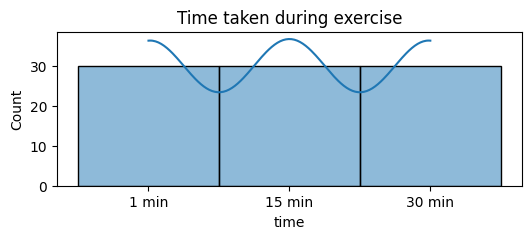

In [16]:
# 2. Univariate Analysis

# Histogram + KDE for 'time'
plt.figure(figsize=(6,2))
sns.histplot(data['time'], kde = True)
plt.title("Time taken during exercise")
plt.show()



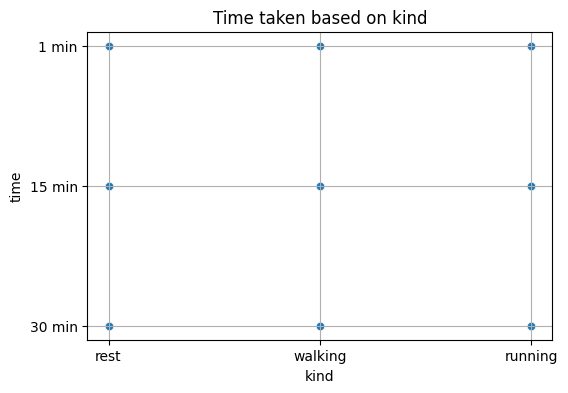

Text(0.5, 1.0, 'Pulse level based on activity')

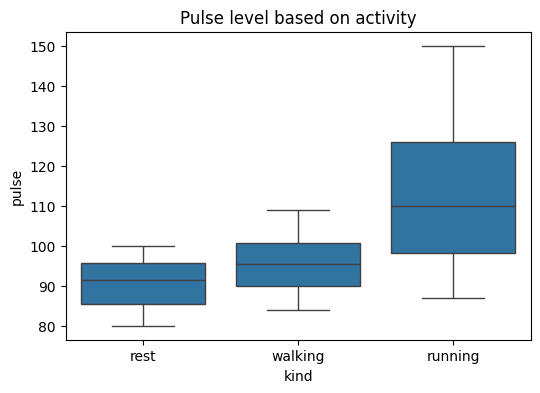

In [19]:
# 3. Bivariate Analysis

# Scatter plot: time vs kind

plt.figure(figsize=(6,4))
sns.scatterplot(x = 'kind', y = 'time', data = data)
plt.title("Time taken based on kind")
plt.grid(True)
plt.show()

# Boxplot: pulse by kind
plt.figure(figsize=(6,4))
sns.boxplot(x = 'kind', y = 'pulse', data = data)
plt.title("Pulse level based on activity")


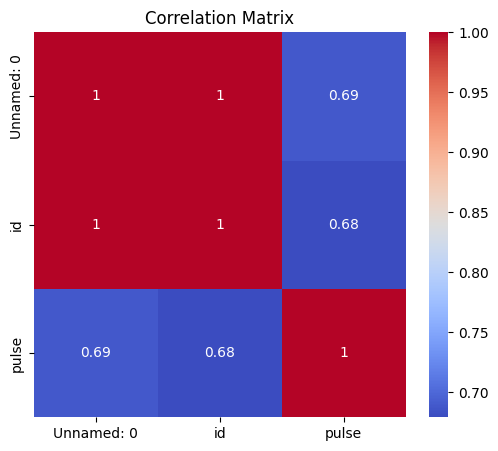

In [38]:
# 4. Correlation Analysis

# Compute correlation matrix for numeric columns
corr = data.corr(numeric_only = True)
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Pulse level based on activity')

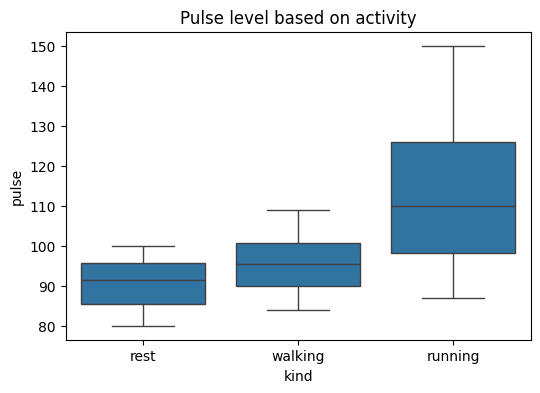

In [39]:
# 5. Outlier detection using Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x = 'kind', y = 'pulse', data = data)
plt.title("Pulse level based on activity")


In [47]:
# 6. Outlier removal

Q1 = data['id'].quantile(0.25)
Q3 = data['id'].quantile(0.35)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_clean = data[(data['id'] >= lower_bound) & (data['id'] <= upper_bound)]
print(f"Original dataset size: {data.shape[0]}")
print(f"Dataset size after removing outliers: {data_clean.shape[0]}")
                                                  

Original dataset size: 90
Dataset size after removing outliers: 36


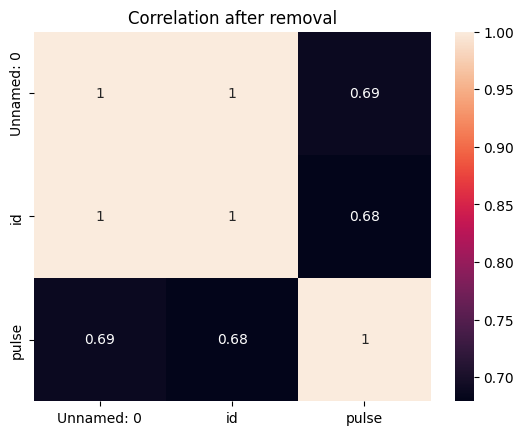

In [40]:
# 7. Correlation after outlier removal

corr_clean = data.corr(numeric_only = True)
sns.heatmap(corr, annot = True)
plt.title("Correlation after removal")
plt.show()

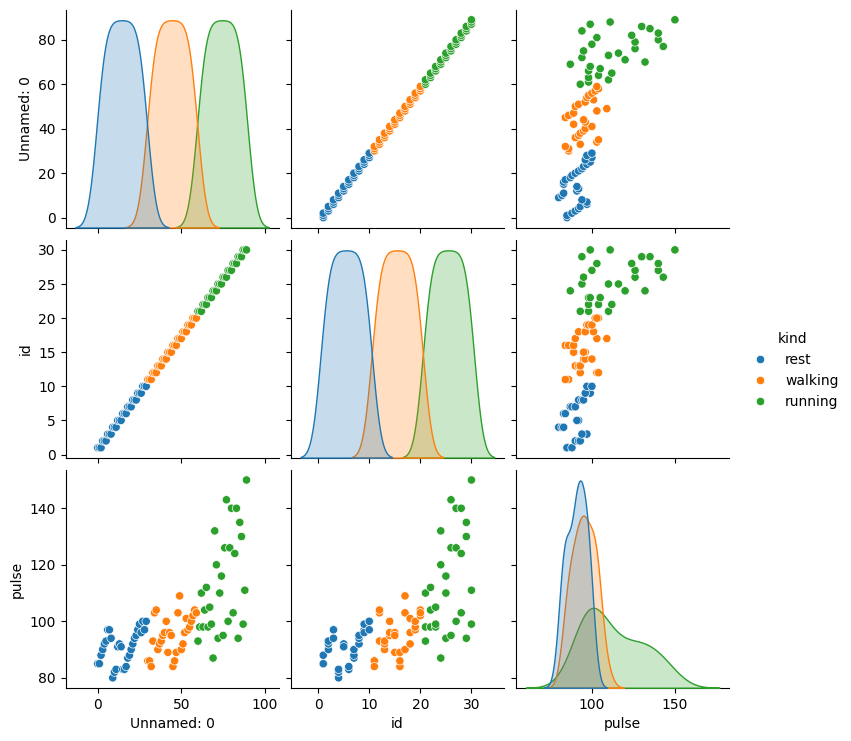

In [49]:
sns.pairplot(data,hue="kind")
plt.show()